In [156]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  
import numpy as np

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [157]:
df_da_us = df[(df['job_country']== 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_da_us = df_da_us.dropna(subset='salary_year_avg')

df_skills_exploded = df.explode('job_skills').copy()

df_skills_exploded = df_skills_exploded[(df_skills_exploded['job_country']== 'United States') & (df_skills_exploded['job_title_short'] == 'Data Analyst')].copy()

df_skills_exploded.dropna(subset='salary_year_avg').copy()
df_skills_exploded['job_skills'] = df_skills_exploded['job_skills'].replace('None', np.nan).copy()
df_skills_exploded.dropna(subset='job_skills').copy()
df_skills_exploded.dropna(subset='salary_year_avg')

df_skills_per_job = df_skills_exploded.groupby('job_title_short')['job_skills'].agg('count')

df_skills_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,r,"{'programming': ['r'], 'sync': ['zoom']}"
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,zoom,"{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,word,"{'analyst_tools': ['word', 'excel', 'powerpoin..."
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,excel,"{'analyst_tools': ['word', 'excel', 'powerpoin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",excel,"{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ..."
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ..."


In [158]:
df_skills_da = df_skills_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values('count', ascending=False)

df_skills_da.loc['Total'] = df_skills_da['count'].sum()


df_skills_da = df_skills_da.dropna()
df_skills_da = df_skills_da.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
df_skills_da

da_job_count = (len(df_da_us))

df_skills_da['skill_percent'] = df_skills_da['skill_count']/da_job_count *100
df_skills_da = df_skills_da[df_skills_da['skill_count'] > 0]

df_skills_da_top_6 = df_skills_da.head(6)
df_skills_da_top_6 = df_skills_da_top_6.reset_index()
df_skills_da_top_6['skill_percent_formatted'] = df_skills_da_top_6['skill_percent'].apply(lambda x: f"{x:.2f}%")
df_skills_da_top_6

,job_skills,skill_count,median_salary,skill_percent,skill_percent_formatted
0,sql,2508,91000.0,57.655172,57.66%
1,excel,1808,84392.0,41.563218,41.56%
2,python,1431,97500.0,32.896552,32.90%
3,tableau,1364,92875.0,31.356322,31.36%
4,sas,926,90000.0,21.287356,21.29%
5,r,893,92500.0,20.528736,20.53%


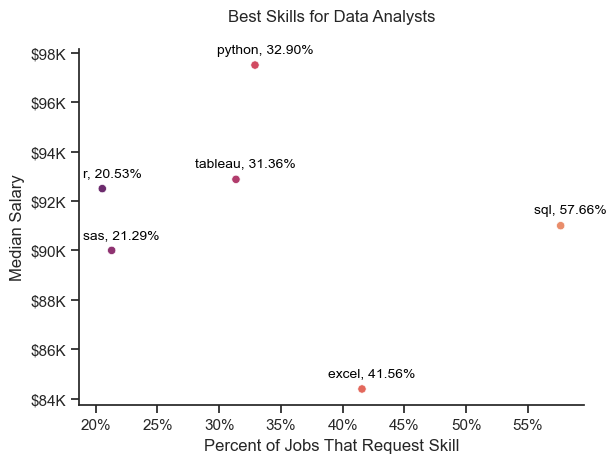

In [176]:
ax = sns.scatterplot(data=df_skills_da_top_6, x='skill_percent', y='median_salary', hue='job_skills', palette='flare')



for i, row in df_skills_da_top_6.iterrows():
    percentage_str = row['skill_percent_formatted']
    label_text = f'{row['job_skills']}, {percentage_str}'
    ax.text(row['skill_percent'] + 0.8,  # Add a small offset to x
            row['median_salary'] + 500,   # Add a small offset to y
            label_text,            # The column you want as the label
            horizontalalignment='center',   # Adjust alignment
            size='small',                 # Adjust font size
            color='black')                # Adjust font color
plt.legend().remove()
plt.xlabel('Percent of Jobs That Request Skill')
plt.ylabel('Median Salary')
sns.despine()
plt.title('Best Skills for Data Analysts', pad=20)
plt.tight_layout()

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

In [160]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))


In [161]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,sap
0,analyst_tools,spss
0,analyst_tools,outlook
0,analyst_tools,ssrs
0,analyst_tools,sharepoint
...,...,...
9,sync,google chat
9,sync,microsoft teams
9,sync,rocketchat
9,sync,ringcentral


In [162]:
df_DA_skills_tech = df_skills_da.merge(df_technology, left_on='job_skills', right_on='skills')
skill_limit = 5 
df_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.0,57.655172,programming,sql
1,1808,84392.0,41.563218,analyst_tools,excel
2,1431,97500.0,32.896552,programming,python
3,1364,92875.0,31.356322,analyst_tools,tableau
4,926,90000.0,21.287356,analyst_tools,sas
...,...,...,...,...,...
169,1,83500.0,0.022989,webframeworks,node.js
170,1,95000.0,0.022989,programming,no-sql
171,1,72500.0,0.022989,programming,erlang
172,1,65000.0,0.022989,libraries,graphql


In [163]:
df_DA_skills_tech_high_demand = df_DA_skills_tech[df_DA_skills_tech['skill_percent'] > skill_limit]

df_DA_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


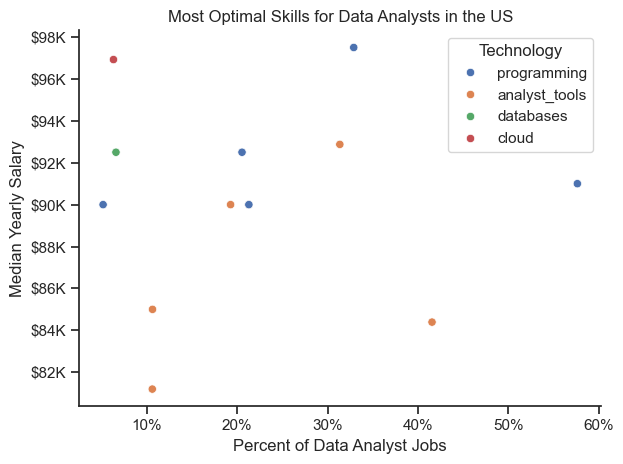

In [164]:
from adjustText import adjust_text


sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

texts = []

# Prepare texts for adjustText
for index, row in df_DA_skills_tech_high_demand.iterrows():
    # 'row['skills']' gets the skill name (e.g., 'sql', 'excel')
    # 'row['skill_percent']' gets the already formatted percentage string (e.g., "57.655172%")
    label_text = f"{row['skills']} ({row['skill_percent']})"

    # Create the text object at the dot's position using the NUMERICAL x-coordinate
    texts.append(ax.text(row['skill_percent'], # X-coordinate (numerical)
                         row['median_salary'],        # Y-coordinate
                         label_text,                  # The combined label string
                         horizontalalignment='left',  # Initial alignment for the text
                         verticalalignment='center',
                         size='small',
                         color='dimgray',             # Color of the text
                         weight='semibold'))          # Font weight
# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()

# Side Project

In [165]:
df_skills_per_job_pivot = df_skills_per_job_pivot.fillna(0)
df_skills_per_job_pivot['Total'] = df_skills_per_job_pivot.sum(axis=1)
df_skills_per_job_pivot = df_skills_per_job_pivot.sort_values(by='Total', ascending=False)
df_skills_per_job_pivot = df_skills_per_job_pivot.astype(int)

df_skills_per_job_top_5 = df_skills_per_job_pivot.head(5)
df_skills_per_job_top_5 

company_name                                            \
job_title_short Business Analyst Cloud Engineer Data Analyst Data Engineer   
job_skills                                                                   
sql                         3564            137        34452         23958   
python                      1409            126        18382         22762   
r                            929             33        11659          3155   
tableau                     2213             41        19311          5022   
excel                       3128             79        27519          1970   

                                                                              \
job_title_short Data Scientist Machine Learning Engineer Senior Data Analyst   
job_skills                                                                     
sql                      30034                       301                7803   
python                   42379                       644                4267   
r                        26022                       157                2775   
tableau                  13859                        73                4678   
excel                     6598                        43                4013   

                                                                              \
job_title_short Senior Data Engineer Senior Data Scientist Software Engineer   
job_skills                                                                     
sql                             6651                  7421               727   
python                          6692                  9816               699   
r                                655                  5741               127   
tableau                         1225                  2841               333   
excel                            366                  1402               280   

                 ... search_location                             \
job_title_short  ...  Cloud Engineer Data Analyst Data Engineer   
job_skills       ...                                              
sql              ...             137        34452         23958   
python           ...             126        18382         22762   
r                ...              33        11659          3155   
tableau          ...              41        19311          5022   
excel            ...              79        27519          1970   

                                                                              \
job_title_short Data Scientist Machine Learning Engineer Senior Data Analyst   
job_skills                                                                     
sql                      30034                       301                7803   
python                   42379                       644                4267   
r                        26022                       157                2775   
tableau                  13859                        73                4678   
excel                     6598                        43                4013   

                                                                              \
job_title_short Senior Data Engineer Senior Data Scientist Software Engineer   
job_skills                                                                     
sql                             6651                  7421               727   
python                          6692                  9816               699   
r                                655                  5741               127   
tableau                         1225                  2841               333   
excel                            366                  1402               280   

                   Total  
job_title_short           
job_skills                
sql              8450754  
python           7871610  
r                3757128  
tableau          3637944  
excel            3329820  

[5 rows x 151 columns]

In [166]:
df_us = df[df['job_country'] == 'United States']

df_jobs_count = df_us['job_title_short'].value_counts()
df_jobs_count

job_title_short
Data Analyst                 67816
Data Scientist               58830
Data Engineer                35080
Senior Data Scientist        12946
Senior Data Analyst          11791
Senior Data Engineer          9289
Business Analyst              7382
Software Engineer             1814
Machine Learning Engineer      921
Cloud Engineer                 423
Name: count, dtype: int64

In [167]:
for job_name, job_count in df_jobs_count
    df_skill_percent = 

SyntaxError: expected ':' (2238427261.py, line 1)